#### Assignment_04
Name: Yash Wadhwa NUID: 002778382

#### Perform hierarchical clustering on the Play data and and the data generated with the help of two equations of concentric circles, adding some random noise, as shown the class. Apply various distance measures, including single, multiple, and average linkages.

#### Perform k-Means clustering on the Boston housing data and arrive at an optimal number of clusters via the elbow method.



#### 1. Hierarchical Clustering on the Play Data

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics

In [119]:
import pandas as pd
df=pd.read_excel("/Users/wadhwa/Desktop/dsem/Assignment-4/play.xlsx")
df

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play
5,sunny,80,90,strong,dont_play
6,sunny,85,85,weak,dont_play
7,sunny,72,95,weak,dont_play
8,sunny,69,70,weak,play
9,rain,71,80,strong,dont_play


In [120]:
df['Decision'] = df['Decision'].map({'play': 1, 'dont_play': 0})
df

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,1
1,overcast,83,78,weak,1
2,overcast,64,65,strong,1
3,overcast,81,75,weak,1
4,sunny,75,70,strong,1
5,sunny,80,90,strong,0
6,sunny,85,85,weak,0
7,sunny,72,95,weak,0
8,sunny,69,70,weak,1
9,rain,71,80,strong,0


In [121]:
X = df.drop('Decision', axis=1).copy()
y=df['Decision']

In [122]:
X_encoded = pd.get_dummies(X, columns=['Outlook','Windy'])
X_encoded

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak
0,72,90,1,0,0,1,0
1,83,78,1,0,0,0,1
2,64,65,1,0,0,1,0
3,81,75,1,0,0,0,1
4,75,70,0,0,1,1,0
5,80,90,0,0,1,1,0
6,85,85,0,0,1,0,1
7,72,95,0,0,1,0,1
8,69,70,0,0,1,0,1
9,71,80,0,1,0,1,0


In [123]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X_encoded)

In [124]:
data_scaled = pd.DataFrame(data_scaled, columns=X_encoded.columns)
data_scaled.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak
0,0.624648,0.780810,0.008676,0.0,0.000000,0.008676,0.000000
1,0.728659,0.684764,0.008779,0.0,0.000000,0.000000,0.008779
2,0.701520,0.712481,0.010961,0.0,0.000000,0.010961,0.000000
3,0.733700,0.679352,0.009058,0.0,0.000000,0.000000,0.009058
4,0.730986,0.682253,0.000000,0.0,0.009746,0.009746,0.000000


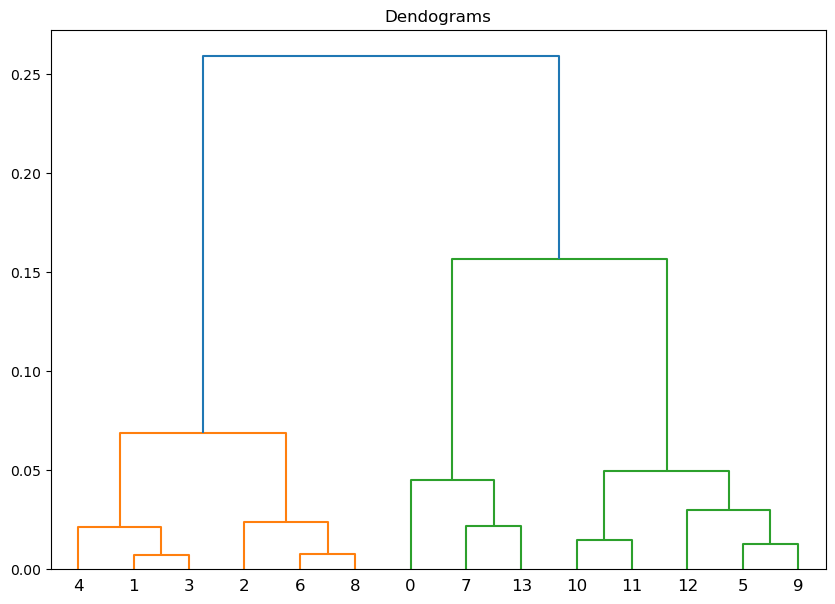

In [125]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) 

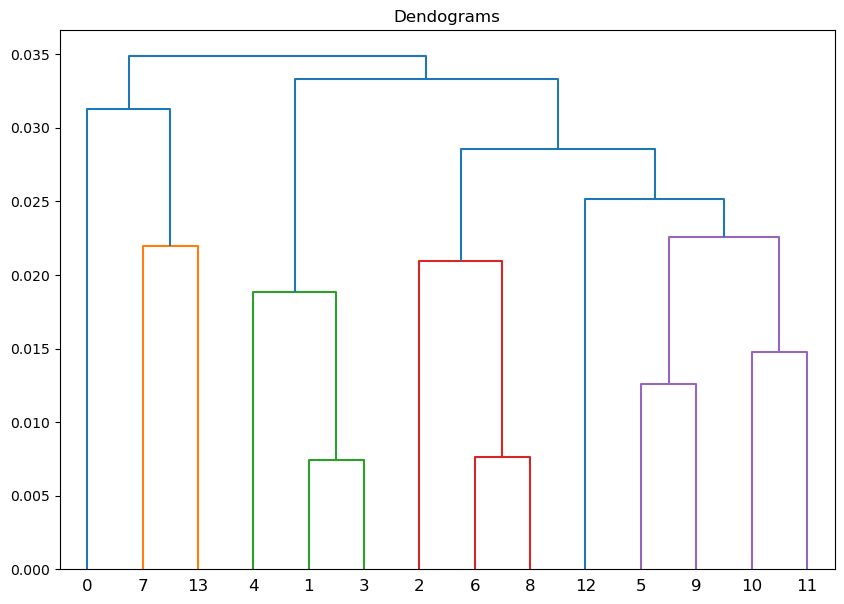

In [126]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

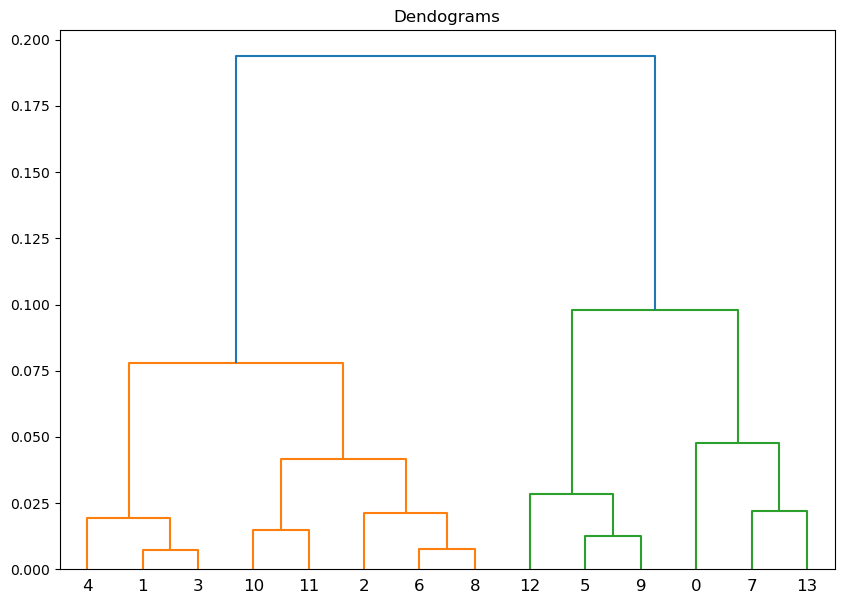

In [127]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

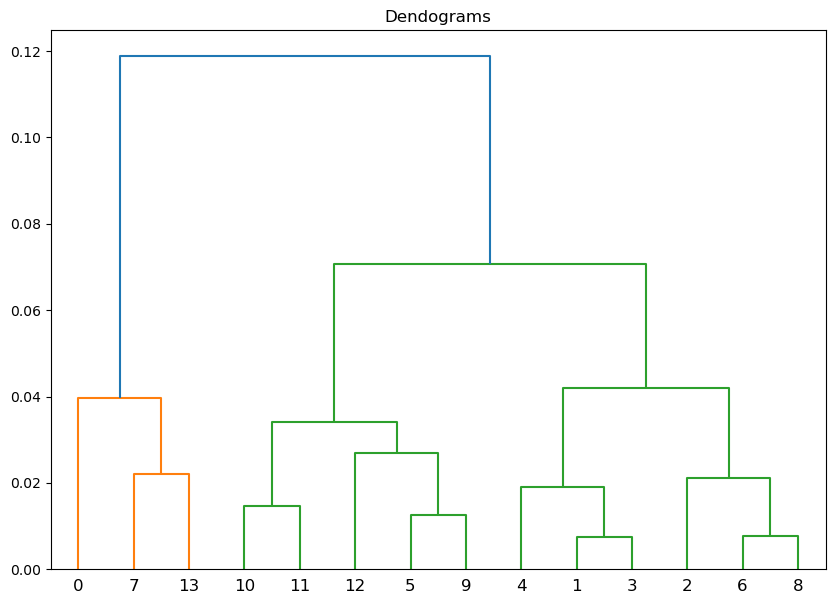

In [128]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))

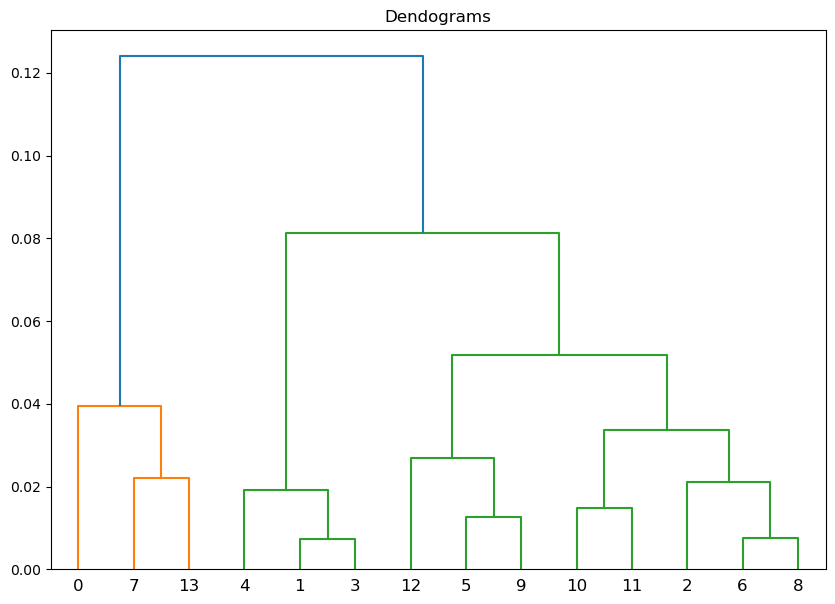

In [129]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='weighted'))

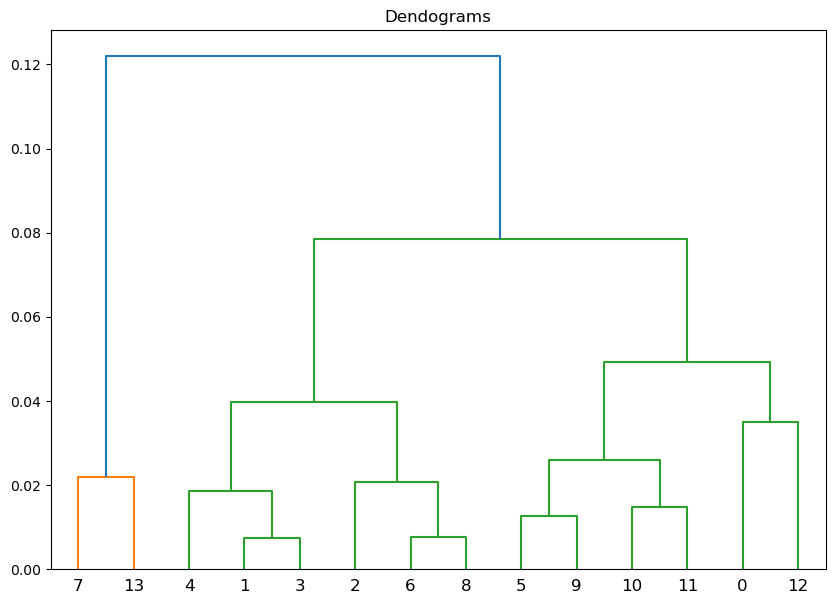

In [130]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='centroid'))

In [131]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [132]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="single",affinity='euclidean', n_clusters=2)
model = model.fit(data_scaled)
ymin=model.labels_
p_score = purity_score(y,ymin)
print(f'Purity Score using single linkage is {p_score}')


Purity Score using single linkage is 0.6428571428571429


In [133]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df['Decision'],model.labels_))
print(classification_report(df['Decision'],model.labels_))

ConfusionMatrix [[4 1]
 [7 2]]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.67      0.22      0.33         9

    accuracy                           0.43        14
   macro avg       0.52      0.51      0.42        14
weighted avg       0.56      0.43      0.39        14



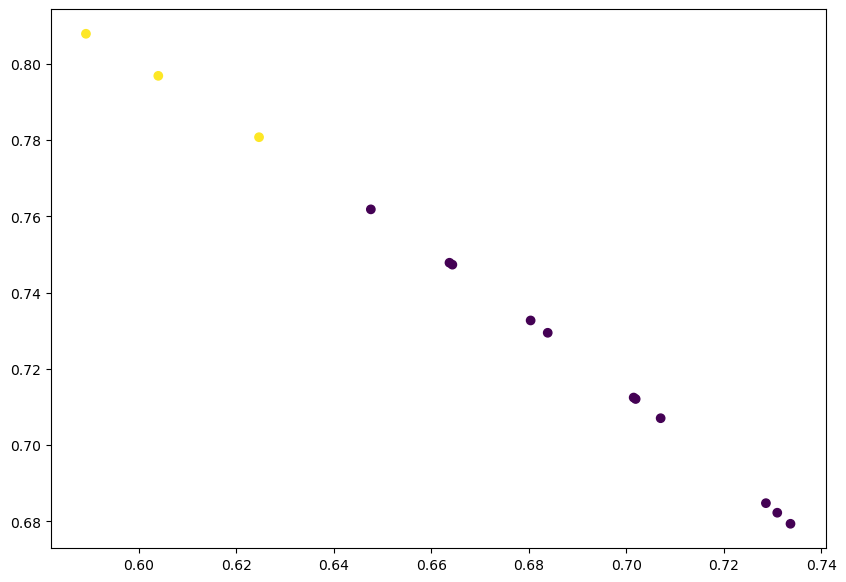

In [134]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c= model.labels_)

In [135]:
model = AgglomerativeClustering(linkage="complete", affinity='euclidean',n_clusters=2)
model = model.fit(data_scaled)
ymax=model.labels_
p_score = purity_score(y,ymax)
print(f"Purity Score using complete linkage is {p_score}")

Purity Score using complete linkage is 0.6428571428571429


In [136]:
print("ConfusionMatrix",confusion_matrix(df['Decision'],model.labels_))
print(classification_report(df['Decision'],model.labels_))

ConfusionMatrix [[3 2]
 [3 6]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.75      0.67      0.71         9

    accuracy                           0.64        14
   macro avg       0.62      0.63      0.63        14
weighted avg       0.66      0.64      0.65        14



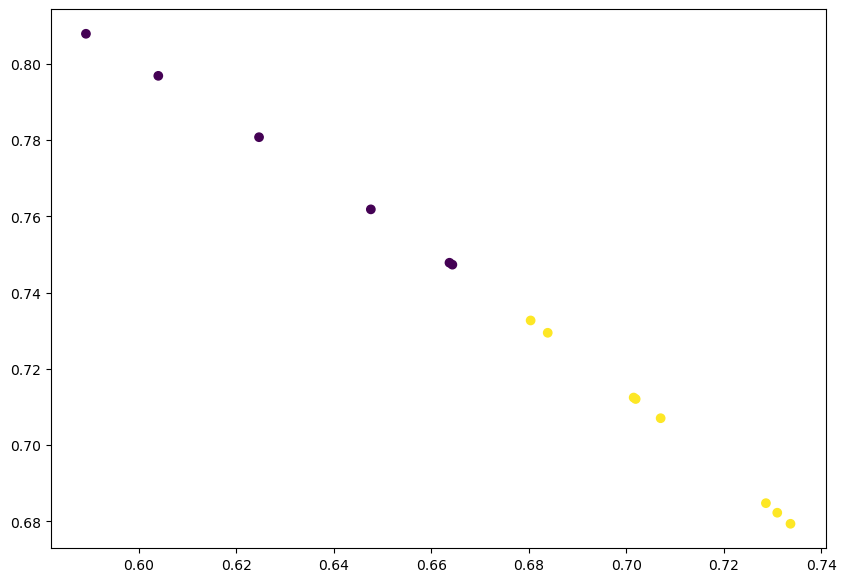

In [137]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c= model.labels_)

In [138]:
model = AgglomerativeClustering(linkage="average", affinity='euclidean',n_clusters=2)
model =model.fit(data_scaled)
yavg=model.labels_
p_score = purity_score(y,yavg)
print(f'Purity Score using average linkage is {p_score}')

Purity Score using average linkage is 0.6428571428571429


In [139]:
print("ConfusionMatrix",confusion_matrix(df['Decision'],model.labels_))
print(classification_report(df['Decision'],model.labels_))

ConfusionMatrix [[4 1]
 [7 2]]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.67      0.22      0.33         9

    accuracy                           0.43        14
   macro avg       0.52      0.51      0.42        14
weighted avg       0.56      0.43      0.39        14



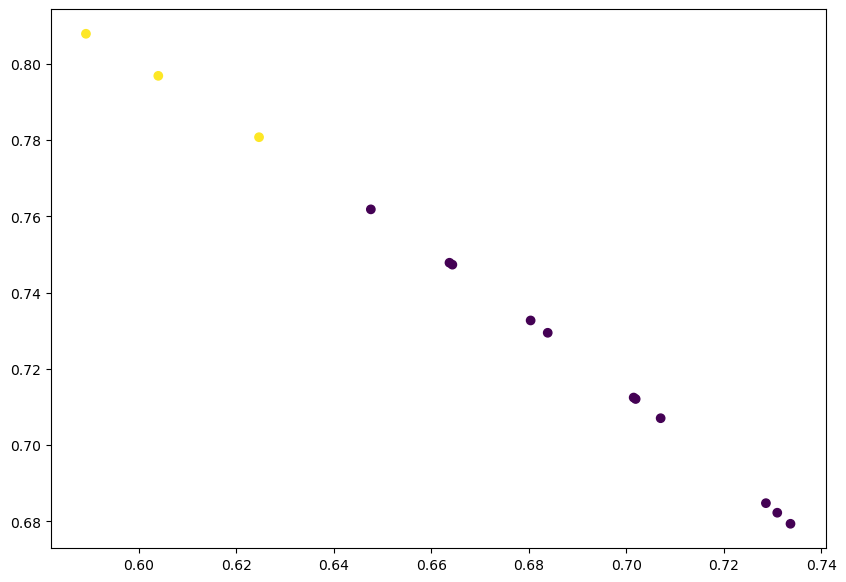

In [140]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c= model.labels_)

In [141]:
model = AgglomerativeClustering(linkage="ward", affinity='euclidean',n_clusters=2)
model = model.fit(data_scaled)
yward=model.labels_
p_score = purity_score(y,yward)
print(f'Purity Score using ward linkage is {p_score}')

Purity Score using ward linkage is 0.6428571428571429


In [142]:
print("ConfusionMatrix",confusion_matrix(df['Decision'],model.labels_))
print(classification_report(df['Decision'],model.labels_))

ConfusionMatrix [[4 1]
 [4 5]]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.83      0.56      0.67         9

    accuracy                           0.64        14
   macro avg       0.67      0.68      0.64        14
weighted avg       0.71      0.64      0.65        14



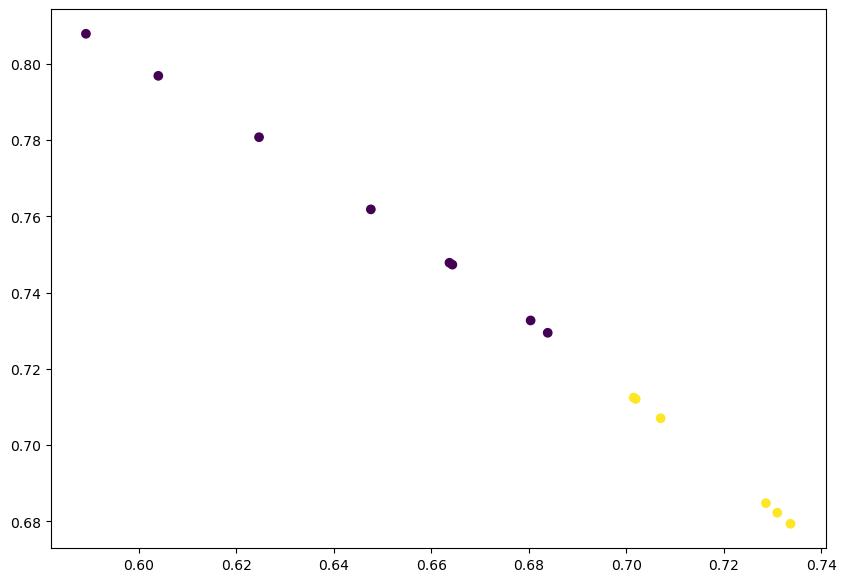

In [143]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c= model.labels_)

#### 2. Performing Hierarchical Clustering on the data generated with the help of two equations of concentric circles, adding some random noise.

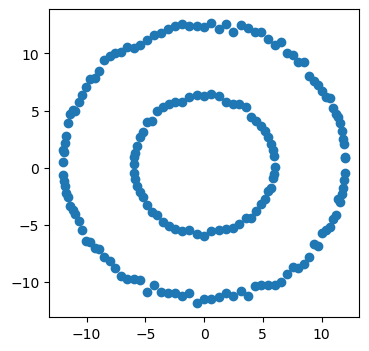

In [144]:
import random
r = [6]
c = [60]
for r, c in zip(r, c):
        ln = np.linspace(0, 2*np.pi, c, endpoint=False)
        x1 = r * np.cos(ln)
        y1 = r * np.sin(ln)
        data1 = np.c_[x1, y1]
noise = 0.008*np.asarray(random.sample(range(0,c),c))
y1 = y1 + noise
r = [12]
c = [120]
for r, c in zip(r, c):
        ln = np.linspace(0, 2*np.pi, c, endpoint=False)
        x2 = r * np.cos(ln)
        y2 = r * np.sin(ln)
        data2 = np.c_[x2, y2]
noise = 0.008*np.asarray(random.sample(range(0,c),c))
y2 = y2+ noise

x = np.concatenate((x1, x2), axis=None)        
y = np.concatenate((y1, y2), axis=None)        
        
data = list(zip(x, y))

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

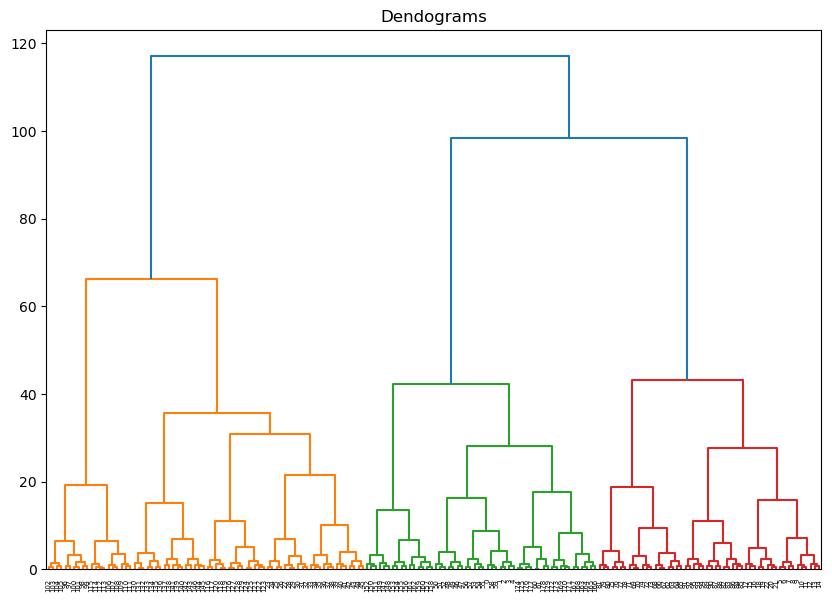

In [145]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

In [146]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",affinity='euclidean', n_clusters=2)
model = model.fit(data)

In [147]:
model.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

#### 3. Performing k-Means clustering on the Play data and arriving at an optimal number of clusters via the elbow method.

In [148]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [149]:
df=pd.read_excel("/Users/wadhwa/Desktop/dsem/Assignment-4/play.xlsx")
df

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play
5,sunny,80,90,strong,dont_play
6,sunny,85,85,weak,dont_play
7,sunny,72,95,weak,dont_play
8,sunny,69,70,weak,play
9,rain,71,80,strong,dont_play


In [150]:
df['Decision'] = df['Decision'].map({'play': 1, 'dont_play': 0})
df

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,1
1,overcast,83,78,weak,1
2,overcast,64,65,strong,1
3,overcast,81,75,weak,1
4,sunny,75,70,strong,1
5,sunny,80,90,strong,0
6,sunny,85,85,weak,0
7,sunny,72,95,weak,0
8,sunny,69,70,weak,1
9,rain,71,80,strong,0


In [151]:
X = df.drop('Decision', axis=1).copy()
y = df['Decision']

In [152]:
X_encoded = pd.get_dummies(X, columns=['Outlook','Windy'])
X_encoded

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak
0,72,90,1,0,0,1,0
1,83,78,1,0,0,0,1
2,64,65,1,0,0,1,0
3,81,75,1,0,0,0,1
4,75,70,0,0,1,1,0
5,80,90,0,0,1,1,0
6,85,85,0,0,1,0,1
7,72,95,0,0,1,0,1
8,69,70,0,0,1,0,1
9,71,80,0,1,0,1,0


In [153]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X_encoded)

In [154]:
data_scaled = pd.DataFrame(data_scaled, columns=X_encoded.columns)
data_scaled.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak
0,0.624648,0.780810,0.008676,0.0,0.000000,0.008676,0.000000
1,0.728659,0.684764,0.008779,0.0,0.000000,0.000000,0.008779
2,0.701520,0.712481,0.010961,0.0,0.000000,0.010961,0.000000
3,0.733700,0.679352,0.009058,0.0,0.000000,0.000000,0.009058
4,0.730986,0.682253,0.000000,0.0,0.009746,0.009746,0.000000


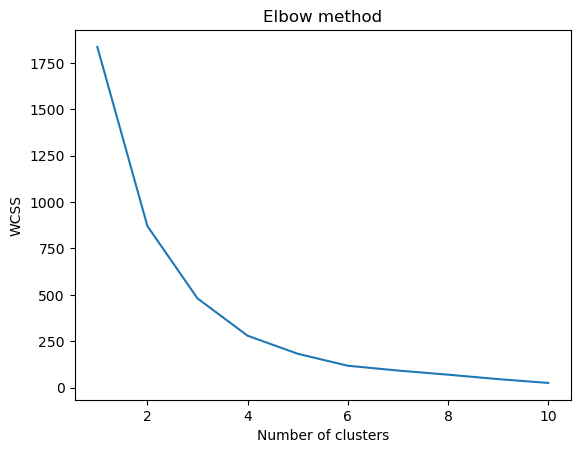

In [155]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_encoded)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
km = KMeans(n_clusters=2)
km = km.fit(X_encoded)

In [157]:
df['labels'] = km.labels_
df

,Outlook,Temperature,Humidity,Windy,Decision,labels
0,overcast,72,90,strong,1,1
1,overcast,83,78,weak,1,0
2,overcast,64,65,strong,1,0
3,overcast,81,75,weak,1,0
4,sunny,75,70,strong,1,0
5,sunny,80,90,strong,0,1
6,sunny,85,85,weak,0,1
7,sunny,72,95,weak,0,1
8,sunny,69,70,weak,1,0
9,rain,71,80,strong,0,0


In [158]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Decision'],km.labels_))
print(classification_report(df['Decision'],km.labels_))

[[2 3]
 [7 2]]
              precision    recall  f1-score   support

           0       0.22      0.40      0.29         5
           1       0.40      0.22      0.29         9

    accuracy                           0.29        14
   macro avg       0.31      0.31      0.29        14
weighted avg       0.34      0.29      0.29        14



#### 4. Performing k-Means clustering on the Boston Housing data and arriving at an optimal number of clusters via the elbow method.

In [159]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [160]:
import pandas as pd
df=pd.read_excel("/Users/wadhwa/Desktop/dsem/Assignment-4/boston housing.xlsx")
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.099998  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.699997  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.300003  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.800003  2.5050    1  273   

            PT           B  LSTAT

In [161]:
X = df.drop('MV', axis=1).copy()
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [162]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled

array([[1.26388343e-05, 3.59966799e-02, 4.61957380e-03, ...,
        3.05971783e-02, 7.93726779e-01, 9.95908147e-03],
       [5.78529916e-05, 0.00000000e+00, 1.49769552e-02, ...,
        3.77071830e-02, 8.40785470e-01, 1.93620045e-02],
       [5.85729961e-05, 0.00000000e+00, 1.51744629e-02, ...,
        3.82044443e-02, 8.43137753e-01, 8.64965872e-03],
       ...,
       [1.23765824e-04, 0.00000000e+00, 2.43009602e-02, ...,
        4.27762070e-02, 8.08470301e-01, 1.14884668e-02],
       [2.24644716e-04, 0.00000000e+00, 2.44548911e-02, ...,
        4.30471667e-02, 8.06519441e-01, 1.32831258e-02],
       [9.69214298e-05, 0.00000000e+00, 2.43887932e-02, ...,
        4.29308168e-02, 8.11392426e-01, 1.61092782e-02]])

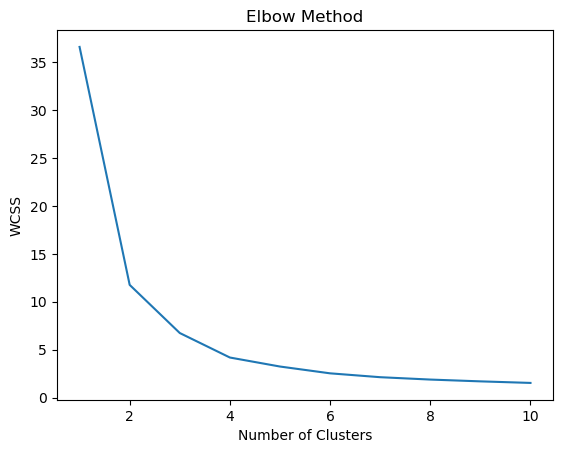

In [163]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [164]:
km = KMeans(n_clusters=4)
km = km.fit(data_scaled)

In [165]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data_scaled)

In [166]:
clustered_data = df.copy()
clustered_data['Cluster'] = y_kmeans
display(clustered_data.sort_values(by='Cluster'))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV,Cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.3,396.899994,4.98,24.000000,0
223,0.61470,0.0,6.20,0,0.507,6.618,80.800003,3.2721,8,307,17.4,396.899994,7.60,30.100000,0
224,0.31533,0.0,6.20,0,0.504,8.266,78.300003,2.8944,8,307,17.4,385.049988,4.14,44.799999,0
225,0.52693,0.0,6.20,0,0.504,8.725,83.000000,2.8944,8,307,17.4,382.000000,4.63,50.000000,0
226,0.38214,0.0,6.20,0,0.504,8.040,86.500000,3.2157,8,307,17.4,387.380005,3.13,37.599998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.13554,12.5,6.07,0,0.409,5.594,36.799999,6.4980,4,345,18.9,396.899994,13.09,17.400000,3
67,0.05789,12.5,6.07,0,0.409,5.878,21.400000,6.4980,4,345,18.9,396.209992,8.10,22.000000,3
66,0.04379,80.0,3.37,0,0.398,5.787,31.100000,6.6115,4,337,16.1,396.899994,10.24,19.400000,3
250,0.14030,22.0,5.86,0,0.431,6.487,13.000000,7.3967,7,330,19.1,396.279999,5.90,24.400000,3
